In [ ]:
!git clone https://github.com/tbmoon/basic_vqa.git

In [9]:
!python ./basic_vqa/train.py --num_epochs=30 --batch_size=256 --log_dir="./logs" --input_dir="./input_dir"

/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skip

/var/folders/h5/qpm9sgm506d94pz2n1wg3m5h0000gp/T/ipykernel_27903/4046081141.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


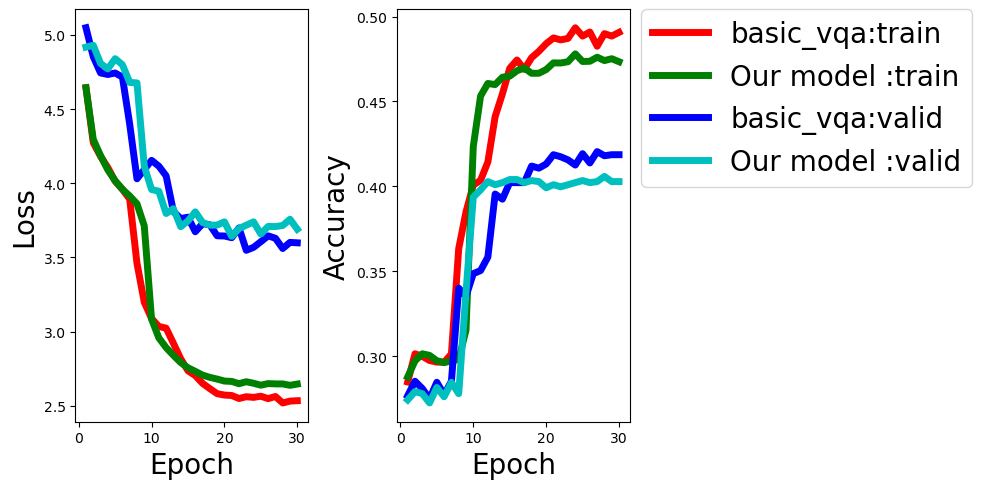

In [16]:
import numpy as np
import csv
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
num_epochs = 30
for phase in ['train', 'valid']:
    
    epoch = []
    loss = []
    acc = []
    epoch2 = []
    loss2 = []
    acc2 = []

    for i in range(num_epochs):
        
        with open('./logs/{}-log-epoch-{:02d}.txt'.format(phase, i+1), 'r') as f:
            df = csv.reader(f, delimiter='\t')
            data = list(df)

        epoch.append(float(data[0][0]))
        loss.append(float(data[0][1]))
        acc.append(float(data[0][3]))
        with open('../logs/{}-log-epoch-{:02d}.txt'.format(phase, i+1), 'r') as f:
            df = csv.reader(f, delimiter='\t')
            data = list(df)

        epoch2.append(float(data[0][0]))
        loss2.append(float(data[0][1]))
        acc2.append(float(data[0][2]))

    plt.subplot(1, 2, 1)
    if phase == 'train':
        plt.plot(epoch, loss, label = "basic_vqa:" + phase , color = 'red', linewidth = 5.0)
        plt.plot(epoch2, loss2, label = "Our model :" + phase, color = 'g', linewidth = 5.0)
    else:
        plt.plot(epoch, loss, label = "basic_vqa:" + phase, color = 'blue', linewidth = 5.0)
        plt.plot(epoch2, loss2, label = "Our model :" +phase, color = 'c', linewidth = 5.0)
            
    plt.xlabel('Epoch', fontsize = 20)
    plt.ylabel('Loss', fontsize = 20)
        
    plt.subplot(1, 2, 2)
    plt.tight_layout()

    if phase == 'train':
        plt.plot(epoch, acc, label =  "basic_vqa:" +  phase, color = 'red', linewidth = 5.0)
        plt.plot(epoch2, acc2, label = "Our model :" +phase, color = 'g', linewidth = 5.0)
    else:
        plt.plot(epoch, acc, label =  "basic_vqa:" + phase, color = 'blue', linewidth = 5.0)
        plt.plot(epoch2, acc2, label = "Our model :" +phase, color = 'c', linewidth = 5.0)
    
    plt.xlabel('Epoch', fontsize = 20)
    plt.ylabel('Accuracy', fontsize = 20)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
    
    
# plt.savefig('./basic_vqa/png/train.png', dpi = fig.dpi)

In [43]:
!python3 basic_vqa/Model_Evaluation.py


/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sh69/miniconda3/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Acurracy for NOT accepted <unk> yes/no : 0.7301
Acurracy for NOT accepted <unk> number : 0.3700
Acurracy for NOT accepted <unk> other : 0.1840
Acurracy for NOT accepted <unk> for all : 0.4107


In [1]:
import json
questions_id_type = {}
with open("../input_dir/Annotations/filtered_train2017_annotations.json") as f:
	answers = json.load(f)["annotations"]
	for a in answers:
		questions_id_type[a["question_id"]] = a["answer_type"]
with open("questionIdAnswerTypeTrain.json", "w") as outfile: 
    json.dump(questions_id_type, outfile)
